# Project: WeRateDogs Twitter Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Analyzing and Visualizing the Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Project Context
Project goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

### Dataset Description 
In this project, I will work on the following three datasets.

#### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, it was filtered for tweets with ratings only (there are 2356).
This data was extracted programmatically, but didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages too. Further assessing and cleaning would be done on these columns before using them for analysis and visualization.

#### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. Since WeRateDogs Twitter archive has been provided and specifically the tweet IDs within it, can gather this data for all 5000+.

#### Image Predictions File

One more cool thing: Every image in the WeRateDogs Twitter archive were run through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Definition for the predictions columns 
- p1 is the algorithm's #1 prediction for the image in the tweet 
- p1_conf is how confident the algorithm is in its #1 prediction 
- p1_dog is whether or not the #1 prediction is a breed of dog 
- p2 is the algorithm's second most likely prediction 
- p2_conf is how confident the algorithm is in its #2 prediction 
- p2_dog is whether or not the #2 prediction is a breed of dog 
etc.

This Project Analysis would be done using Python withe the aid of some of its packages, which would be imported

In [225]:
# importing python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tweepy
import requests
import os
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns
import plotly.express as px

<a id='wrangling'></a>
## Data Wrangling

The Data Wrangling Process would be done in three iterative steps
1. **Data Gathering**
2. **Assessing Data**
3. **Data Cleaning**

## Data Gathering
In the cell below, I will be gathering **all** three pieces of data needed for this project and load them in the notebook. 

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [226]:
# to download the pre-gathered twitter archived enhanced data from a url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
response = requests.get(url)
print(response)

<Response [200]>


The Output "**<Response [200]>**' means the request was successful. To download the content and save to 'twitter_archive_enhanced.csv'

In [227]:
# to download the content of the url and save to a csv file
with open('twitter_archive_enhanced.csv', 'wb') as file:
    file.write(response.content)

At the point, the data is downloaded. To check if the file exists using the OS library

In [228]:
# to check if the file exists, TRUE means it exists
os.path.exists('twitter_archive_enhanced.csv')

True

In [229]:
# to read the twitter archived enhanced data and convert to a dataframe
twitter_archive_df = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [230]:
# to download the pre-gathered twitter archived enhanced data from a url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print(response)

<Response [200]>


The Output "**<Response [200]>**' means the request was successful. To download the content and save to a text file

In [231]:
# to download the content of the url and save to a csv file

filename = url.split('/')[-1].replace('-','_') #using the url to generate the file name 
print(filename)

with open (filename, 'wb') as file:
    file.write(response.content)

image_predictions.tsv


At the point, the data is downloaded. To check if the file exists using the OS library

In [232]:
os.path.exists('image_predictions.tsv')

True

In [233]:
# to read the image prediction data and convert to a dataframe
image_predictions_df = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


With the aid of the Twitter Access Keys and Twitter Consumer key, The Additional data has been extracted and saved in the 'tweet_json.txt' using the code above. To extract the data from the file and convert to a DataFrame.

In [235]:
tweet_df = pd.read_json('tweet-json.txt', lines = True)
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


To check the Shape of each DataFrame 

In [335]:
#checking the number of rows and columns of the data
print(twitter_archive_df.shape)
print(image_predictions_df.shape)
print(tweet_df.shape)

(2356, 17)
(2075, 12)
(2354, 31)


From the Query above,

- Twitter Archive Data has 2356 rows and 17 columns
- Image Prediction Data has 2075 rows and 12 columns
- Tweets Data scrapped using Tweepy has 2354 rows and 31 columns

## Assessing Data

In this section, I detected and documented quality issues and tidiness issue using **both** visual assessment
programmatic assessement to assess the data.

- **Quality Issues** are issues in the data relating to its content. Data are Quality issues are dirty data
- **Tidiness Issues** are issues in the data relating to the structure of the data.

To understand the column definitions clearly, check [Twitter Developer Documentation](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)

**Note:** Key Points I followed when I assessed the data.

* I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* I did not need to gather the tweets beyond August 1st, 2017. I can, but I won't be able to gather the image predictions for these tweets since I don't have access to the algorithm used.

#### Visual Assessment

In [336]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [337]:
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [338]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


NB: Microsoft Excel was used to aid my Visual Assessment

#### Programmatic Assessment

- **The Size of each Table**

In [339]:
# the size of the twitter archived data
twitter_archive_df.shape

(2356, 17)

In [340]:
# the size of the scraped tweet data
tweet_df.shape

(2354, 31)

In [341]:
# the size of the image prediction data
image_predictions_df.shape

(2075, 12)

- **To check the Datatypes of the columns for each Table**

In [342]:
# for the twitter archived data
twitter_archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [343]:
# for the Scraped tweets data
tweet_df.dtypes

created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

In [344]:
# for the image prediction data
image_predictions_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

- **To get more Information about the Tables**

In [345]:
# for the twitter archived data
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [346]:
# for the Scraped Tweets data
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [347]:
# for the image prediction data
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- **Additional Prgrammatic Assessments**

In [348]:
# to find the descriptive statistics of the Twitter Archive Data
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [349]:
# to find descriptive statistics of the Scraped Tweets data
tweet_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [350]:
# to find descriptive statistics of the image prediction data
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [351]:
# to observe the unique names of the dogs 
twitter_archive_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [352]:
# taking a look at 10 sample rows from the twitter archived data
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2050,671497587707535361,NaN,NaN,2015-12-01 01:14:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pip. He is a ship captain. Many years ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671497587...,11,10,Pip,None,None,None,None
2067,671141549288370177,NaN,NaN,2015-11-30 01:39:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Neat pup here. Enjoys lettuce. Long af ears. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671141549...,9,10,None,None,None,None,None
1493,692752401762250755,NaN,NaN,2016-01-28 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes could I get one pupper to go please...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692752401...,13,10,None,None,None,pupper,None
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None
1561,688385280030670848,NaN,NaN,2016-01-16 15:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's takes top-notch selfies. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688385280...,12,10,Louis,None,None,None,None
1754,678798276842360832,NaN,NaN,2015-12-21 04:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She fucking hates trees. 7/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678798276...,7,10,Linda,None,None,None,None
813,771102124360998913,NaN,NaN,2016-08-31 21:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He works for @TODAYshow. Supe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771102124...,12,10,Charlie,None,None,None,None
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957...,13,10,Stanley,None,None,None,None
276,840632337062862849,NaN,NaN,2017-03-11 18:35:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maddie and Gunner. They are consi...,NaN,NaN,NaN,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
1020,746757706116112384,NaN,NaN,2016-06-25 17:31:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Maddie. She gets some wicked air time....,NaN,NaN,NaN,https://vine.co/v/5BYq6hmrEI3,11,10,Maddie,None,None,None,None


In [353]:
# taking a look at 10 sample rows from the scraped tweets data
tweet_df.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
969,2016-07-04 23:00:03+00:00,750101899009982464,750101899009982464,Meet Lilah. She agreed on one quick pic. Now s...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 750101891116392448, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3344,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1492,2016-01-28 04:44:32+00:00,692568918515392513,692568918515392512,This is Chester. He's been guarding this pumpk...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 692568911158489088, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4739,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2242,2015-11-21 02:07:05+00:00,667886921285246976,667886921285246976,This is Erik. He's fucken massive. But also ki...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667886917715943426, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2011,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
798,2016-09-05 15:58:34+00:00,772826264096874500,772826264096874496,Meet Roosevelt. He's preparing for takeoff. Ma...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772826251237199873, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8842,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1401,2016-02-16 02:04:04+00:00,699413908797464576,699413908797464576,Meet Miley. She's a Scandinavian Hollabackgirl...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 699413904074665988, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2258,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
396,2017-01-27 23:16:13+00:00,825120256414846976,825120256414846976,RT @dog_rates: Say hello to Pablo. He's one go...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jan 27 17:04:02 +0000 2017...,NaN,NaN,NaN
1262,2016-03-16 01:46:45+00:00,709918798883774466,709918798883774464,Meet Watson. He's a Suzuki Tickleboop. Leader ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 709918790847492096, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3250,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
834,2016-08-23 00:40:31+00:00,767884188863397888,767884188863397888,This is Tito. He's on the lookout. Nobody know...,False,"[0, 63]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 767884178016927744, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5309,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1085,2016-06-01 23:52:28+00:00,738156290900254721,738156290900254720,This is Storkson. He's wet and sad. 10/10 chee...,False,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 738156281941262337, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2768,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2121,2015-11-27 23:36:23+00:00,670385711116361728,670385711116361728,Meet Larry. He's a Panoramic Benzoate. Can sho...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670385704808108032, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,593,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [354]:
# taking a look at 10 sample rows from the image prediction data
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1952,863553081350529029,https://pbs.twimg.com/ext_tw_video_thumb/86355...,1,Eskimo_dog,0.413330,True,malamute,0.347646,True,Siberian_husky,0.149536,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1920,856282028240666624,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4,Chihuahua,0.876543,True,Italian_greyhound,0.032962,True,Cardigan,0.020776,True
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,Italian_greyhound,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True
1728,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
1208,742385895052087300,https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg,1,Cardigan,0.566911,True,Border_collie,0.117566,True,Appenzeller,0.047664,True
1862,842765311967449089,https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg,1,tub,0.665238,False,bucket,0.105166,False,Labrador_retriever,0.029340,True
884,698953797952008193,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,1,Italian_greyhound,0.382378,True,redbone,0.102255,True,shower_cap,0.076834,False
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True


#### Quality Issues Discovered From Assessment

`twitter archived` table

- **retweet_status_id** should be Null (To work with Original Tweets)
- Erroneous datatypes (tweet_id, timestamp)
- Incorrectly inputted Dog names such as ('a', 'an', ...)
- Presence of Outliers(unlikely high ratings) for Numerator/Denominator 
- Presence of 'None' for Dog names, should be Nan
- Removal of Columns not Needed for the Analysis
- Dogs with Multiple stages
- Not all Tweets are for Dogs

`tweet` table

- Removal of Columns not needed for analysis

`image prediction` table
- Not all images are dogs
- Removal of columns not needed for analysis
- Datatype of tweet ID


#### Tidiness Issues Discovered From Assessment

- Additional information from tweet_df should be in Twitter archive table
- should be one column for Dog stage instead of four columns

### Cleaning Data

This will be done using the define-code-test framework. Before commencing with cleaning the tables, copies of the tables are created

In [355]:
image_predictions_clean = image_predictions_df.copy()
twitter_archive_clean = twitter_archive_df.copy()
tweet_clean = tweet_df.copy()

### Quality

#### `tweet archive table`: 'retweeted_status_id' should be null

**Define**

In order to work with original tweet from the timeline, retweets are not to be considered so the "retweeted_status_id" should be Null

**Code**

In [356]:
# to check the columns in the table 
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [357]:
# to get rid of rows that are retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean.retweeted_status_id.values

array([nan, nan, nan, ..., nan, nan, nan])

**Test**

In [358]:
# to check if the code was successful
assert twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()].shape[0] == 0

#### `tweet archive table`: Modifying the Datatypes of columns

**Define**

The tweet_id should be changed to a string datatype and the timestamp should be changed to a Datetime datatype 

**Code**

In [359]:
# to confirm the inaccuracy in data type of the two columns
twitter_archive_clean[['tweet_id', 'timestamp']].dtypes

tweet_id      int64
timestamp    object
dtype: object

In [360]:
# to convert tweet_id datatype to String
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

# to convert timestamp datatype to Datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

**Test**

In [361]:
twitter_archive_clean[['tweet_id', 'timestamp']].dtypes

tweet_id                  object
timestamp    datetime64[ns, UTC]
dtype: object

#### `tweet archive table`: Incorrectly inputed Dog names

**Define**

The Name column has inaccurate dog names and I have been able to list them out and would change them accordingly

**Code**

In [362]:
# to look at the liat of unique names of the dog
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

After observing all the incorrect names, I was able to spot some names that were wrongly inputted

In [363]:
# the list containing the inaccurate names 
wrong_names = ['O', 'his', 'my', 'space', 'a', 'an', 'not', 'very', 'just', 'all', 'by', 'the', 'this', ]

# to confirm the elements of the list are present in the name column
twitter_archive_clean.name[twitter_archive_clean.name.isin(wrong_names)].unique()

array(['a', 'not', 'O', 'very', 'my', 'his', 'an', 'just', 'this', 'all',
       'the', 'by', 'space'], dtype=object)

Further Investigation was done to confirm the actual names and also confirm the rows which do not contain dog names then I discovered that 
- the name 'O' is for the name "O'Malley"
- the name 'his' is for the name "Quinzo"
- the name 'my' is for the name "Zoey"
- the name 'space' is for the name "space pup"
- the remaining names are meant to be "None" because it does not contain names 

In [364]:
# the code to replace the wrong names with the correct replacement
for name in wrong_names:
    if name == 'O':
        twitter_archive_clean.name.replace(name, "O'Malley", inplace = True)
    elif name == 'his':
        twitter_archive_clean.name.replace(name, "Quinzo", inplace = True)
    elif name == 'my':
        twitter_archive_clean.name.replace(name, "Zoey", inplace = True)
    elif name == 'space':
        twitter_archive_clean.name.replace(name, "space pup", inplace = True)
    else:
        twitter_archive_clean.name.replace(name, "None", inplace = True)

I then used programmatic assessment to check for incorrect names and noticed a pattern for other wrong names 

In [365]:
twitter_archive_clean['wrong_names'] = twitter_archive_clean['name'].str.extract(pat='(^[a-z]+)')
more_wrong_names = twitter_archive_clean['wrong_names'].unique()

In [366]:
# to replace the newly found wrong names 
for name in more_wrong_names:
    twitter_archive_clean.name.replace(name, "None", inplace = True)

In [367]:
# to drop the newly created column
twitter_archive_clean.drop("wrong_names", axis = 1, inplace = True)

**Test**

In [368]:
# to confirm if the changes were made
for name in wrong_names:
    assert name not in twitter_archive_clean.name.values

In [369]:
for name in more_wrong_names:
    assert name not in twitter_archive_clean.name.values

#### `tweet archive table`: Presence of "None" as Dog name

**Define**

In the name column, "None" was used to represent records for Dogs without Names. This should be represent with Nan

**Code**

In [370]:
# to change None" dog names to Nan
twitter_archive_clean.name.replace('None', np.nan, inplace = True)

**Test**

In [371]:
# to confirm that the changes have been made
assert "None" not in twitter_archive_clean.name.values

#### `tweet archive table`: Removing Columns not needed for analysis

**Define**

In the name column, "None" was used to represent records for Dogs without Names. This should be represent with Nan

**Code**

In [372]:
# to list out the columns
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [373]:
# to drop the columns not needed for analysis
unwanted_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls']

twitter_archive_clean = twitter_archive_clean.drop(unwanted_columns, axis = 1)

**Test**

In [374]:
# to confirm the code was successful
for column in unwanted_columns:
    assert column not in twitter_archive_clean.columns

In [375]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### `Scraped Tweet Table`: Unnecessary Columns not needed for analysis

**Define**

There are columns in the table that are not needed for the analysis. I would then drop the columns

**Code**

In [376]:
# to list out all the columns in the tweet table
tweet_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

The only columns needed for my analysis are the "id_str", "retweet_count" and "favorite_count" columns so I would drop the rest

In [377]:
# to drop the remaining columns
tweet_clean = tweet_clean[['id_str', 'retweet_count', 'favorite_count']]

**Test**

In [378]:
# to test if the code was successful
tweet_clean.columns

Index(['id_str', 'retweet_count', 'favorite_count'], dtype='object')

#### `Scraped Tweet Table`: changing the datatype of id_str

**Define**

I want to change the datatype of id_str from integer to string

**Code**

In [379]:
tweet_clean['id_str'] = tweet_clean['id_str'].astype(str)

**Test**

In [380]:
tweet_clean['id_str'].dtypes

dtype('O')

#### `Image Prediction Table`: Wrong Data type for tweet ID column

**Define**

The Tweet ID column should be a string instead of an integer

**Code**

In [381]:
# to check the data type of the tweet_id column
image_predictions_clean.tweet_id.dtypes

dtype('int64')

In [382]:
# to change the data type
image_predictions_clean['tweet_id'] = image_predictions_clean.tweet_id.astype(str)

**Test**

In [383]:
# to check if the code worked 
image_predictions_clean['tweet_id'].dtypes

dtype('O')

#### `Image Prediction Table`: Dropping Columns not needed for analysis

**Define**

There are columns not needed for the analysis which I would drop

**Code**

In [384]:
# to list out all the columns
image_predictions_clean.columns 

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [385]:
# to drop the columns not needed for this analysis
image_predictions_clean.drop(['jpg_url', 'img_num'], axis = 1, inplace = True)

**Test**

In [386]:
# to check if the code worked
image_predictions_clean.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

#### `Image Prediction Table`: Not all Images are dogs

**Define**

From the information gotten for the pre-gathered image prediction data, the images were run through a neural network that made predictions for the images to determine the breed of dogs and the confidence level attached to each prediction with prediction confidence 1 > prediction confidence 2 > prediction confidence 3. 

Since all the images are not for dogs, filtering conditions would be created to filter for images which are dogs. 


**Code**

First step is to observe the descriptive statistics of the image prediction table

In [387]:
image_predictions_clean.describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


To also observe the p1_dog, p2_dog and p3_dog columns (these columns confirm if the predictions are dogs or not)

In [388]:
image_predictions_clean[['p1_dog', 'p2_dog', 'p3_dog']].sample(7)

,p1_dog,p2_dog,p3_dog
9,True,True,True
1388,True,True,True
1154,False,True,False
1965,True,True,True
233,False,False,False
1547,True,True,True
971,False,False,False


In [389]:
image_predictions_clean[['p1_dog', 'p2_dog', 'p3_dog']].nunique()

p1_dog    2
p2_dog    2
p3_dog    2
dtype: int64

To be able to filter which pictures are for dogs, I would be working with two filtering filtering conditions
1. The p1_dog and p2_dog should be "True" since they both have a higher confidence level than p3. The highest confidence level for prediction 3 is 27.34%

2. I would also be filtering based on the confidence level of prediction 1 where it must have confidence level above its 75th percentile and p1_dog must be "True". 


In [390]:
# to find the 75th percentile of the p1 confidence
q75 = image_predictions_clean.p1_conf.quantile(0.75)
q75

0.843855

Since the 75th percentile has been established, then to create the filtering condition that would filter out images which have the possibility of not being a dog

In [391]:
# to set the filtering condition
filter_one = (image_predictions_clean.p1_dog == True) & (image_predictions_clean.p2_dog == True)
filter_two = (image_predictions_clean.p1_dog == True) & (image_predictions_clean.p1_conf > q75)

In [392]:
# to filter out the image prediction table using the filter
image_predictions_clean = image_predictions_clean[np.logical_or(filter_one, filter_two)]

**Test**

In [393]:
# to check if the change was effected 
image_predictions_clean.shape

(1424, 10)

#### `tweet archive table`: Wrongly Inputted / Presence of Extreme Dog ratings (Numerator and Denominator)

**Define**

In the rating_numerator and rating_denominator column, there are Outliers which are clearly errors because they are far off from the expected ratings

**Code**

In [394]:
# to check the descriptibe statistics of the rating numerator and rating denominator column
twitter_archive_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2175.000000,2175.000000
mean,13.215172,10.492874
std,47.725696,7.019084
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [395]:
# to observe the values counts of the rating denominator
twitter_archive_clean['rating_denominator'].value_counts()

10     2153
50        3
11        2
20        2
80        2
15        1
70        1
7         1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [396]:
# to observe the values counts of the rating denominator
twitter_archive_clean['rating_numerator'].value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
17        1
45        1
60        1
143       1
44        1
99        1
121       1
20        1
26        1
144       1
80        1
165       1
50        1
204       1
1776      1
27        1
75        1
24        1
84        1
960       1
15        1
182       1
666       1
88        1
Name: rating_numerator, dtype: int64

I would be handling this issue in 3 steps 

**Step 1:** First, I would like to create a **Boxplot** using plotly to visualize the rating_numerator and rating_denominator columns to understand the data by looking at it more clearly and it wold help get a better look at the outliers compared to the rest of the data points.

**Step 2:** Find the Outiers using a Statistical method known as interquantile range

**Step 3:** Working with the outliers using statistical methods


.

**Step 1**

Creating a Box using Plotly


In [397]:
# creating a boxplot for the rating denominator column
fig = px.box(twitter_archive_clean, x = "rating_denominator", 
             title = 'The Boxplot showing the distribution of the Rating Denominator along with its outliers',
            template = 'simple_white')
fig.show()

In [398]:
# creating a boxplot for the rating numerator column
fig = px.box(twitter_archive_clean, x = "rating_numerator", 
             title = 'The Boxplot showing the distribution of the Rating Numerator along with its outliers',
            template = 'simple_white')
fig.show()

> *NB: The Boxplot below is interactive so you can hover over it to extract details, you can zoom in and out and so much more*

**Step 2**

Using the pandas .quantile() function, I can create a simple function that takes in the columns from the twitter archived dataframe and output the outliers

In [399]:
# create a function to find outliers using IQR
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
    return outliers

In [400]:
# to find the outliers in the rating denominator column using the IQR function created
denominator_outliers = find_outliers_IQR(twitter_archive_clean['rating_denominator'])
print("number of outliers: " + str(len(denominator_outliers)))
print("max outlier value: " + str(denominator_outliers.max()))
print("min outlier value: " + str(denominator_outliers.min()))

denominator_outliers.values

number of outliers: 22
max outlier value: 170
min outlier value: 0


array([  0,  15,  70,   7, 150,  11, 170,  20,  50,  90,  80,  50,  50,
        40,  20, 130, 110,  11,  16, 120,  80,   2], dtype=int64)

In [401]:
# to find the outliers in the rating denominator column using the IQR function created
numerator_outliers = find_outliers_IQR(twitter_archive_clean['rating_numerator'])
print("number of outliers: " + str(len(numerator_outliers)))
print("max outlier value: " + str(numerator_outliers.max()))
print("min outlier value: " + str(numerator_outliers.min()))

numerator_outliers.values

number of outliers: 148
max outlier value: 1776
min outlier value: 0


array([   5,   17,  420,  666,    6,  182,  960,    0,   84,   24,   75,
          5,   27,    3,    4,  165,    4,    5, 1776,    6,    4,    0,
          6,  204,    6,    4,    3,   50,    4,   99,    6,    3,   80,
         45,    4,    3,   60,    6,    6,    6,    5,    3,   44,    1,
          4,    6,    5,    3,    5,    5,    4,    3,    5,    5,    5,
          4,  143,  121,    6,    5,   20,    5,    5,    3,    4,    6,
         26,    5,    6,    2,    2,  144,    6,    5,    6,    5,    5,
          3,    6,   88,    5,    1,    5,    3,    5,    5,    2,    5,
          3,    3,    1,    4,    3,    6,    5,    6,    6,    5,    5,
          6,    1,    6,    6,    5,    4,    6,  420,    4,    2,    1,
          5,    6,    5,    6,    5,    3,    5,    5,    6,    6,    5,
          3,    4,    3,    5,    4,    2,    6,    3,    5,    2,    1,
          6,    4,    3,    2,    5,    4,    6,    2,    6,    3,    1,
          1,    6,    2,    5,    6], dtype=int64)

**Step 3:** Working with the outliers using statistical methods

After identifying the outliers, I had to decide what to do with them. Unfortunately, there is no straightforward "best" solution for dealing with outliers because it depends on the severity of outliers and the goals of the analysis.

I would be handling the outliers by replacing them with the mean value of the column using IQR

In [402]:
# creating a function to find outliers and replace them with the mean value
def impute_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    upper = df[~(df > (q3 + 1.5 * IQR))].max()
    lower = df[~(df < (q1 - 1.5 * IQR))].min()
    df = np.where(df > upper, df.mean(), 
                 np.where(df < lower, df.mean(), df))
    return df

In [403]:
# applying the function on the rating numerator and denominator columns in the twitter archived data
twitter_archive_clean['rating_denominator'] = impute_outliers_IQR(twitter_archive_clean['rating_denominator'])
twitter_archive_clean['rating_numerator'] = impute_outliers_IQR(twitter_archive_clean['rating_numerator'])

**Test**

In [404]:
# to check if the code worked by re-checking the descriptive statistics of the twitter archived data
twitter_archive_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2175.000000,2175.000000
mean,11.142917,10.004985
std,1.608511,0.049330
min,7.000000,10.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,15.000000,10.492874


#### `tweet archive table`: Not all Tweets are for dogs

**Define**

Not all the tweets in the tweet archived data are for dogs. For this cleaning, I would be using the image prediction table to filter out tweets which are not for dogs. This would be done using semi join

**Code**

Semi joins can be done in three steps

In [405]:
# step one is to perform an inner join between the tables tweet archived and image prediction
dog_tweets = twitter_archive_clean.merge(image_predictions_clean, on = "tweet_id")

# to check the shape of the merged table
print(dog_tweets.shape)

# to check the first five rows of the merged dataframe
dog_tweets.head()

(1372, 19)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10.0,NaN,None,None,None,None,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,None,None,None,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False


In [406]:
# step two is to check for the rows of twitter_archive_clean['tweet_id'] and the dog_tweets['tweet_id'] for matching rows
twitter_archive_clean['tweet_id'].isin(dog_tweets['tweet_id']);

In [407]:
# step 3 is to subset the filter in the twitter archive table
subset = twitter_archive_clean['tweet_id'].isin(dog_tweets['tweet_id']);
twitter_archive_clean = twitter_archive_clean[subset]

**Test**

In [408]:
# to test if the code worked
assert twitter_archive_clean.shape[0] == dog_tweets.shape[0]

### Tidiness

#### `Twitter archived Table`: Should be one column for dog stage

**Define**

The Dog stage should be one column instead of multiple columns. Convert the columns "doggo", "flooter", "pupper" and "puppo" into one "stage" column then dropping the other four columns.

**Code**

In [409]:
# to view the twitter archive data
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10.0,NaN,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,None,None,None


In [410]:
# to add the dogg, floofer, pupper and puppo column together
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo'] 

# to check the values of this new column
twitter_archive_clean['dog_stage'].unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

The next step is to replace the "None" with an empty string since it is not among the dog stages

In [411]:
# to replace the "None" with ""
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.map(lambda x: x.replace("None", ""))

# to check if the code worked
twitter_archive_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

From the looks of it, some dogs are observed to have two dog stages. For this analysis, I would assume the first one is the dog stage and replace the other with ""

In [412]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = "doggo"
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = "doggo"
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = "doggo"

In [413]:
# to drop the doggo, floofer, pupper, puppo columns 
twitter_archive_clean.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis = 1, inplace = True)

twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10.0,NaN,
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,


**Test**

In [414]:
# to check if the code worked
twitter_archive_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

#### `Twitter archived Table`: the scraped tweet data should be part of the twitter archived data 

**Define**

I would be joining both the twitter archived data with the scraped tweet data to form one master table 

**Code**

In [415]:
# to merge the two data together
twitter_archive_master = twitter_archive_clean.merge(tweet_clean, how = 'left', left_on = 'tweet_id', right_on = 'id_str')

**Test**

In [416]:
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,id_str,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,NaN,NaN,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,891815181378084864,4328.0,25461.0
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,891327558926688256,9774.0,41048.0
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10.0,NaN,,891087950875897856,3261.0,20562.0
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,,NaN,NaN,NaN


In [417]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'id_str', 'retweet_count',
       'favorite_count'],
      dtype='object')

.


### Storing the Master Data

Since the cleaning stage is done, I would save the Twitter archive master data to a file 

In [418]:
# saving the master table to a file 
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

**Test**

In [419]:
# to check if the file was saved/ it exist locally
os.path.exists('twitter_archive_master.csv')

True

<a id='eda'></a>
## Analyzing and Visualizing the Data

In this section, analysis and visualization would be done on the wrangled data to produce insights

### Question(s) for Analysis

1. Number of Tweets for each dog stage
2. Average retweets per dog stage
3. Average Favorite per dog stage
4. Top popular dog names
5. dog stages with the highest likes and retweets
6. Average rating numerator per dog stage

.

#### Research Question 1: Number of Tweets for each dog stage

In [420]:
# checking the first five rows of twitter archive master
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,id_str,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,NaN,NaN,NaN
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,891815181378084864,4328.0,25461.0
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,891327558926688256,9774.0,41048.0
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10.0,NaN,,891087950875897856,3261.0,20562.0
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,,NaN,NaN,NaN


In [421]:
# plotting a bar graph of the number of tweets in each dog stage
tweet_dog_stage = twitter_archive_clean['dog_stage'].value_counts()
tweet_dog_stage

           1160
pupper      133
doggo        54
puppo        18
floofer       7
Name: dog_stage, dtype: int64

C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



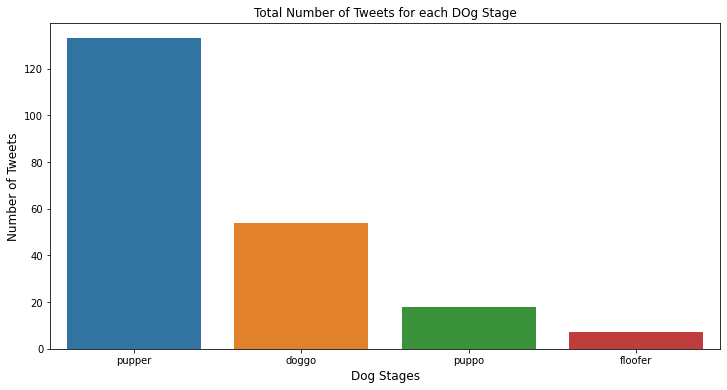

In [422]:
# To visualize the result excluding the row without a dog stage
tweet_dog_stage = tweet_dog_stage[1:]

# to plot a bar graph
plt.figure(figsize = (12, 6))
sns.barplot(tweet_dog_stage.index, tweet_dog_stage.values)
plt.title('Total Number of Tweets for each DOg Stage')
plt.ylabel('Number of Tweets', fontsize = 12)
plt.xlabel('Dog Stages', fontsize = 12)
plt.show()

> From the analysis, It shows that pupper stage of dogs are the dogs that WeRateDogs rate more often and tweet about

#### Research Question 2: Average retweets per dog stage

In [423]:
# to create a table for the dog stage and their average number of retweets
dog_retweet = twitter_archive_master.groupby('dog_stage')['retweet_count'].mean()

dog_retweet = dog_retweet[1:].sort_values()

dog_retweet

dog_stage
floofer    2298.500000
pupper     2386.000000
puppo      4413.818182
doggo      6190.000000
Name: retweet_count, dtype: float64

C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



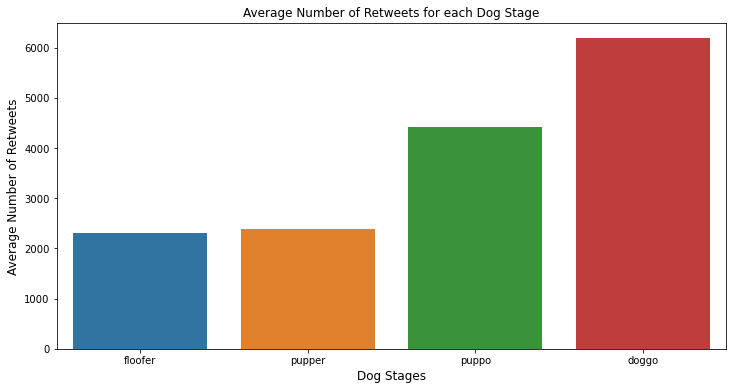

In [424]:
# to plot a bar graph
plt.figure(figsize = (12, 6))
sns.barplot(dog_retweet.index, dog_retweet.values)
plt.title('Average Number of Retweets for each Dog Stage')
plt.ylabel('Average Number of Retweets', fontsize = 12)
plt.xlabel('Dog Stages', fontsize = 12)
plt.show()

> Based on their viewers or followers interest, doggo dogs have the most average retweets then puppo stage of dogs 

#### Research Question 3: Average Favorite per dog stage

In [425]:
# to create a table for the dog stage and their average number of retweets
dog_favorite = twitter_archive_master.groupby('dog_stage')['favorite_count'].mean()

dog_favorite = dog_favorite[1:].sort_values()

dog_favorite

dog_stage
floofer     5913.750000
pupper      7675.663043
puppo      15645.727273
doggo      17695.967742
Name: favorite_count, dtype: float64

C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



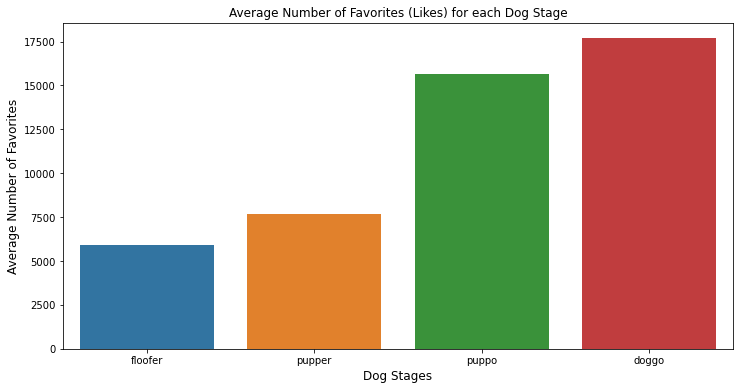

In [426]:
# to plot a bar graph
plt.figure(figsize = (12, 6))
sns.barplot(dog_favorite.index, dog_favorite.values)
plt.title('Average Number of Favorites (Likes) for each Dog Stage')
plt.ylabel('Average Number of Favorites', fontsize = 12)
plt.xlabel('Dog Stages', fontsize = 12)
plt.show()

#### Research Question 4: Top popular dog names

In [427]:
# to check the top 10 popular dog names
top_names = twitter_archive_master['name'].value_counts().sort_values(ascending = False)[:10]

C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



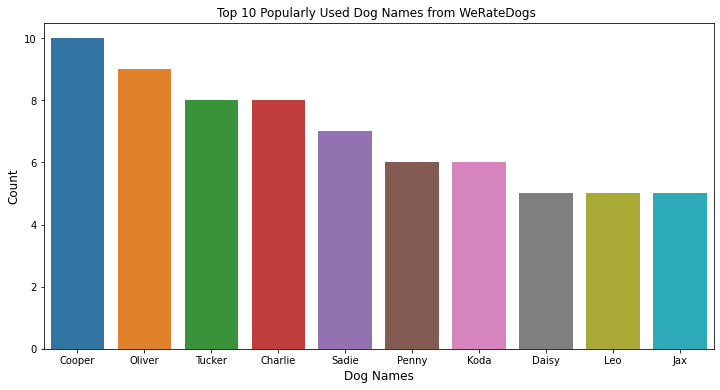

In [428]:
# to plot the result in a bar plot 
plt.figure(figsize = (12, 6))
sns.barplot(top_names.index, top_names.values)
plt.title('Top 10 Popularly Used Dog Names from WeRateDogs ')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Dog Names', fontsize = 12)
plt.show();

> The good thing about this insight is if I am having difficulty naming my dog, I could come check the top popular names of dogs and pick one from there

In [429]:
# other dog names which hav the least amount of usage are 
names_count = twitter_archive_master['name'].value_counts()
least_names = names_count.loc[names_count.values == 1]
least_names.index

Index(['Durg', 'Pubert', 'Link', 'Frönq', 'Stephanus', 'Lucky', 'Smokey',
       'Trip', 'Chipson', 'Fynn',
       ...
       'Godi', 'Timmy', 'Derek', 'Sampson', 'Hercules', 'Jay', 'Mya',
       'Strider', 'Wesley', 'Walter'],
      dtype='object', length=551)

> The code above was used to get the leats names used for dogs from WeRateDogs

#### Research Question 5: dog name and dog stages with the highest likes and retweets

In [430]:
# to get the dogs with the highest retweet
retweet = twitter_archive_master[['name', 'dog_stage', 'retweet_count']][twitter_archive_master.name.notnull()]

top_retweet = retweet.sort_values("retweet_count", ascending = False)[:5]

top_retweet

,name,dog_stage,retweet_count
312,Stephan,,56625.0
255,Bo,doggo,42228.0
78,Zoey,,27680.0
1014,Hurley,,21324.0
203,Lilly,,19297.0


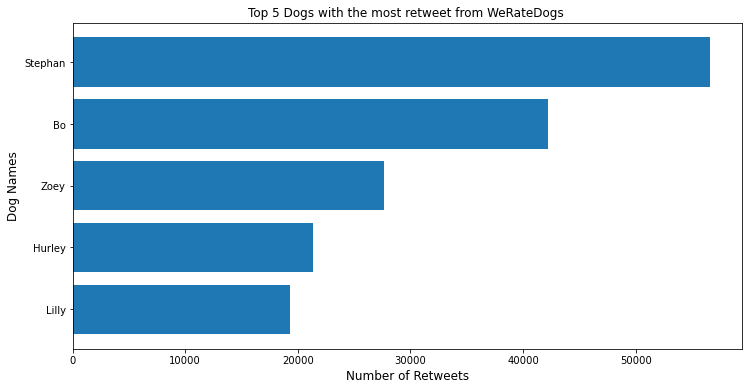

In [431]:
# to plot the result in a bar plot 
plt.figure(figsize = (12, 6))
plt.barh(top_retweet['name'], top_retweet['retweet_count'])
plt.title('Top 5 Dogs with the most retweet from WeRateDogs ')
plt.ylabel('Dog Names', fontsize = 12)
plt.xlabel('Number of Retweets', fontsize = 12)
plt.gca().invert_yaxis()
plt.show();

For the Favorites

In [432]:
# to get the dogs with the highest Favorites
favorite = twitter_archive_master[['name', 'dog_stage', 'favorite_count']][twitter_archive_master.name.notnull()]

top_favorite = favorite.sort_values("favorite_count", ascending = False)[:5]

top_favorite

,name,dog_stage,favorite_count
312,Stephan,,107015.0
255,Bo,doggo,95450.0
78,Zoey,,85011.0
203,Lilly,,73397.0
53,Aja,,71144.0


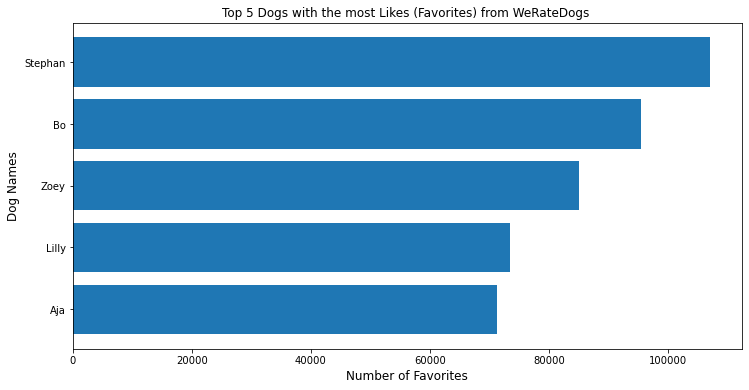

In [433]:
# to plot the result in a bar plot 
plt.figure(figsize = (12, 6))
plt.barh(top_favorite['name'], top_favorite['favorite_count'])
plt.title('Top 5 Dogs with the most Likes (Favorites) from WeRateDogs ')
plt.ylabel('Dog Names', fontsize = 12)
plt.xlabel('Number of Favorites', fontsize = 12)
plt.gca().invert_yaxis()
plt.show();

> From the analysis above, Stephan is the dog with the most retweets and the most likes from WeRateDogs Twitter Posts 

#### Research Question 6: Average rating numerator per dog stage

In [438]:
# to create a table for the dog stage and their average number of retweets
dog_rating = twitter_archive_master.groupby('dog_stage')['rating_numerator'].mean()

dog_rating = dog_rating[1:].sort_values()

dog_rating

dog_stage
pupper     10.956505
doggo      11.985466
floofer    12.000000
puppo      12.055556
Name: rating_numerator, dtype: float64

C:\Users\lewis\OneDrive\Documents\Anaconda3 2021. 11 (64-bit)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



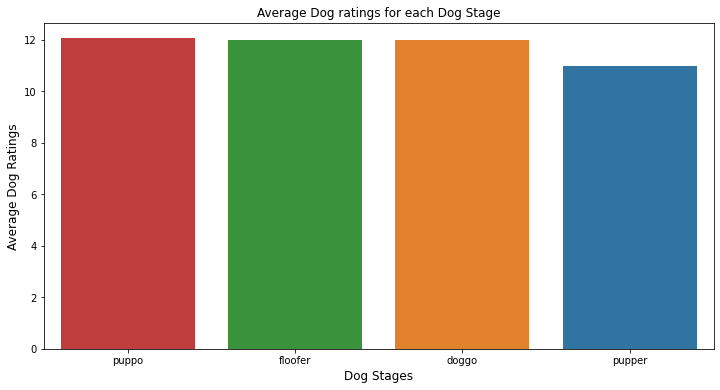

In [440]:
# to plot a bar graph
plt.figure(figsize = (12, 6))
sns.barplot(dog_rating.index, dog_rating.values)
plt.title('Average Dog ratings for each Dog Stage')
plt.ylabel('Average Dog Ratings', fontsize = 12)
plt.xlabel('Dog Stages', fontsize = 12)
plt.gca().invert_xaxis()
plt.show()

> From the analysis above, Puppo dogs have the best ratings with an average of 12.06. Boofer dogs and Doggo dogs come in behind with 12.00 and 11.99 respectively. Pupper dogs have an average of 10.96

<a id='conclusions'></a>
## Conclusions

Finally, The findings are summarized along with the results that have been performed in relation to the question(s) provided at the beginning of the analysis. 

- Pupper stage of Dogs are the dogs that occupy majority of the tweets in WeRateDogs timeline up until August 1, 2017 with 133 tweets with doggo and puppo dogs coming behind then floofer dogs being the least.

- On average, Doggo dogs have the highest retweets and Favorites (likes). Puppo dogs come in second

- Among the dogs on WeRateDogs timeline, Cooper, Oliver, Tucker, Charlie and Sadie are the most popular names of dogs

- The Dog stephan has the highest number of Favorites (107k) and Retweets (56.6k)

- On average, Puppo Dogs have the best ratings followed by Floofer then Doggo. Pupper being the Dogs with the least ratings

### Limitations

- Over 1000 of the tweets do not contain Dog stages. This is due for further investigation

- Some Dogs do not have names

- The scraped tweets records were 2354 instead of 2356 (2 missing records)